## Machine Learning

## This Script contains the following:

### 1. Import libraries

### 2. Loading and Checking the Data

### 3. Data cleaning, Manipulations, and Reprocessing

### 4. The Elbow Technique

### 5. Make an Informed decision about Number of clusters

### 6. Run the K-means Algorithm

### 7. Create Visualizations of the clustered Data

### 8. Attach cluster labels to the Dataframe

### 9. Discuss the clusters

### 10. Calculate Descriptive statistics for clusters

### 11. How the K-means clustering Results can be Useful

### 12. Exporting the Dataframe

## 1. import libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

## 2. Loading and checking the Data

In [2]:
import_path = r"C:\Users\tjsra\OneDrive\Desktop\CF data analyst\Achievement 6\02 Data\prepared data\Conditions_Contributing_to_COVID-19_Deaths_Cleaned.csv"

In [3]:
df_cov_19 = pd.read_csv(import_path)

In [4]:
# Checking the dataset is correctly loaded
print(df_cov_19.head())
print(df_cov_19.info())
df_cov_19.shape

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

(430560, 13)

## 3. Data cleaning, Manipulations, and Reprocessing

In [5]:
# Drop non-numeric columns
df_cov_19_numeric = df_cov_19.select_dtypes(include=[np.number])

In [6]:
# Verify non-numeric columns are dropped
print(df_cov_19_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  float64
 1   Month               430560 non-null  float64
 2   COVID-19 Deaths     430560 non-null  float64
 3   Number of Mentions  430560 non-null  float64
dtypes: float64(4)
memory usage: 13.1 MB
None


In [7]:
# Select relevant features for clustering
features = df_cov_19_numeric[['COVID-19 Deaths', 'Number of Mentions']]

In [8]:
# Verify selection
print(features.head())

   COVID-19 Deaths  Number of Mentions
0              0.0                 0.0
1              0.0                 0.0
2              0.0                 0.0
3              0.0                 0.0
4              0.0                 0.0


In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Verify standardization
print(pd.DataFrame(scaled_features, columns=features.columns).head())

   COVID-19 Deaths  Number of Mentions
0        -0.202201           -0.206292
1        -0.202201           -0.206292
2        -0.202201           -0.206292
3        -0.202201           -0.206292
4        -0.202201           -0.206292


## 4. The Elbow Technique

In [11]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]

score

[-861119.999999591,
 -411572.27049887076,
 -233784.01331769535,
 -149817.20482301657,
 -104462.4399622629,
 -74475.69952175292,
 -57455.71882037404,
 -50129.07886391408,
 -38560.85835094396]

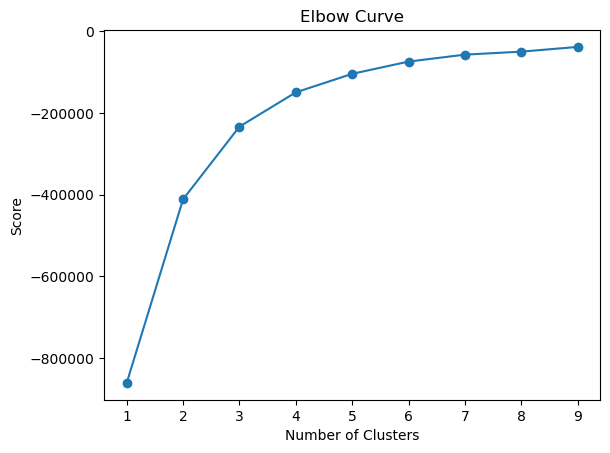

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Export the elbow method graph
elbow_graph_path = "C:\\Users\\tjsra\\OneDrive\\Desktop\\CF data analyst\\Achievement 6\\04 Analysis\\Elbow graph.png"
plt.savefig(elbow_graph_path)

## 5. Make an informed Decision about Number of clusters

### Based on the elbow plot, the optimal number of clusters appears to be 4 because the curve starts to flatten around 4 clusters

## 6. Run the K-means Algorithm

In [14]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)

## 7. Attach Cluster Labels to the Dataframe

In [15]:
# Add the cluster labels to the original dataframe and to the subset
df_cov_19['Cluster'] = kmeans.fit_predict(scaled_features)
df_cov_19_numeric['Cluster'] = kmeans.fit_predict(scaled_features)

In [16]:
# Verify cluster assignment
print(df_cov_19_numeric.head())

     Year  Month  COVID-19 Deaths  Number of Mentions  Cluster
0  2020.0    1.0              0.0                 0.0        0
1  2020.0    2.0              0.0                 0.0        0
2  2020.0    3.0              0.0                 0.0        0
3  2020.0    4.0              0.0                 0.0        0
4  2020.0    5.0              0.0                 0.0        0


## 8. Create visualizations of the Clustered Data

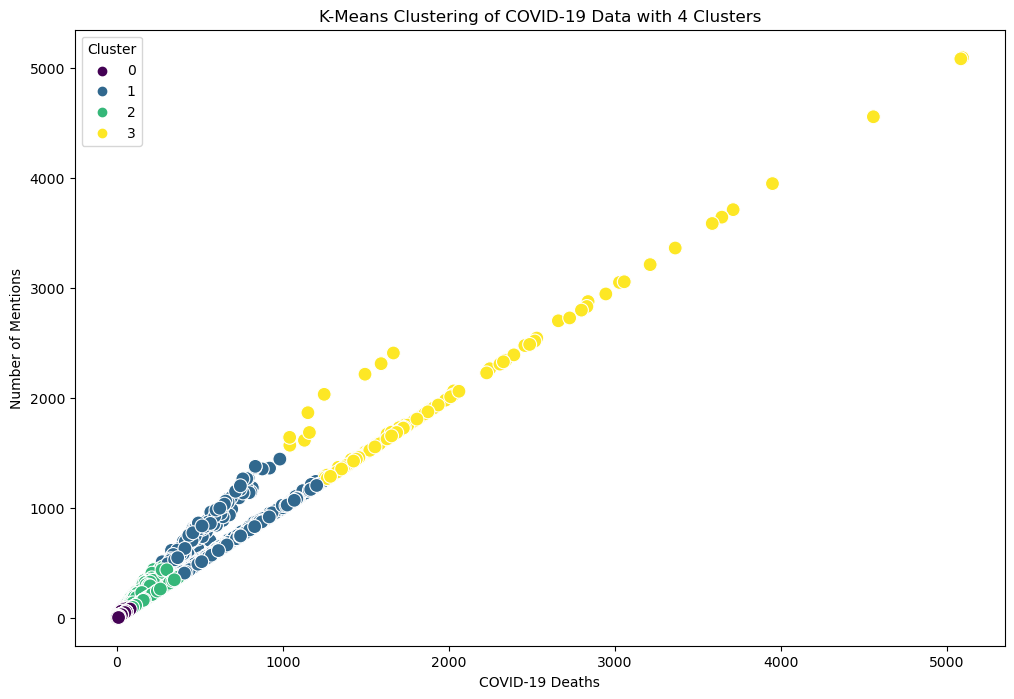

<Figure size 640x480 with 0 Axes>

In [18]:
# Plotting the clusters of COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cov_19_numeric, x='COVID-19 Deaths', y='Number of Mentions', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of COVID-19 Data with 4 Clusters')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend(title='Cluster')
plt.show()


# Export the scatterplot of clusters

scatterplot_path = r"C:\Users\tjsra\OneDrive\Desktop\CF data analyst\Achievement 6\04 Analysis\scatterplot.png"
plt.savefig(scatterplot_path)

## Perform additional K-means clustering analyses focusing on the top 5 conditions:

### 1. Influenza and pneumonia
### 2. Vascular and unspecified dementia
### 3. Ischemic heart disease
### 4. Diabetes
### 5. Renal failure

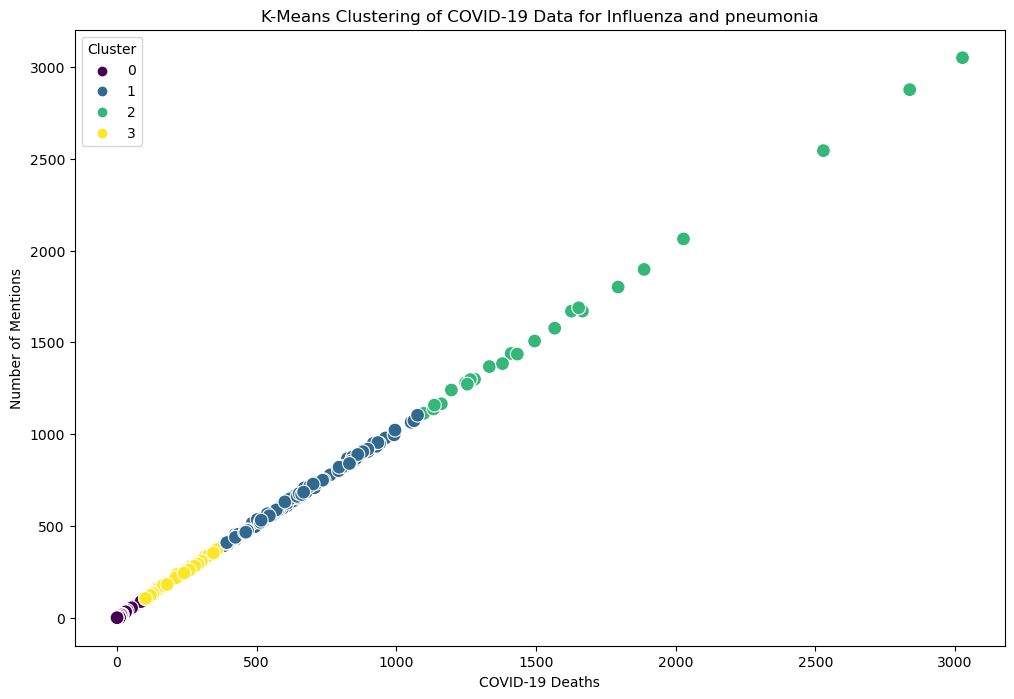

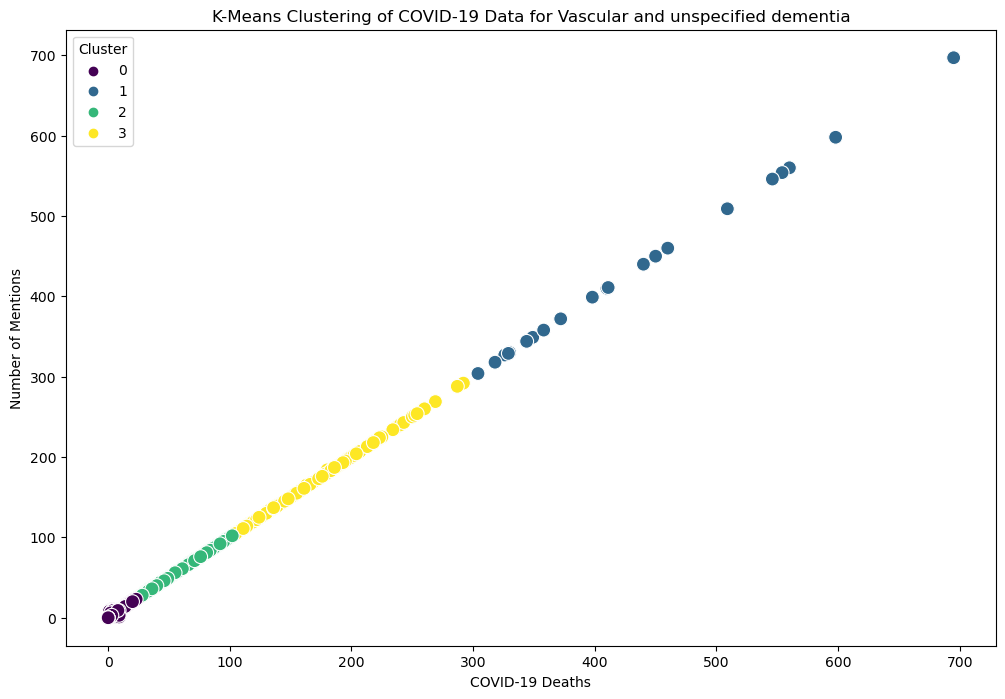

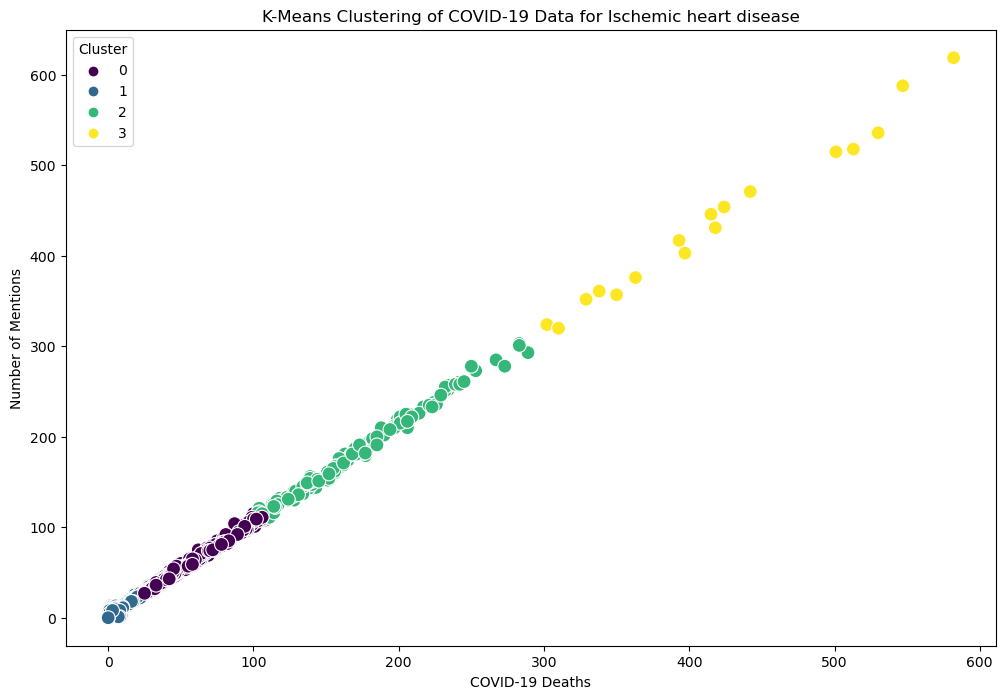

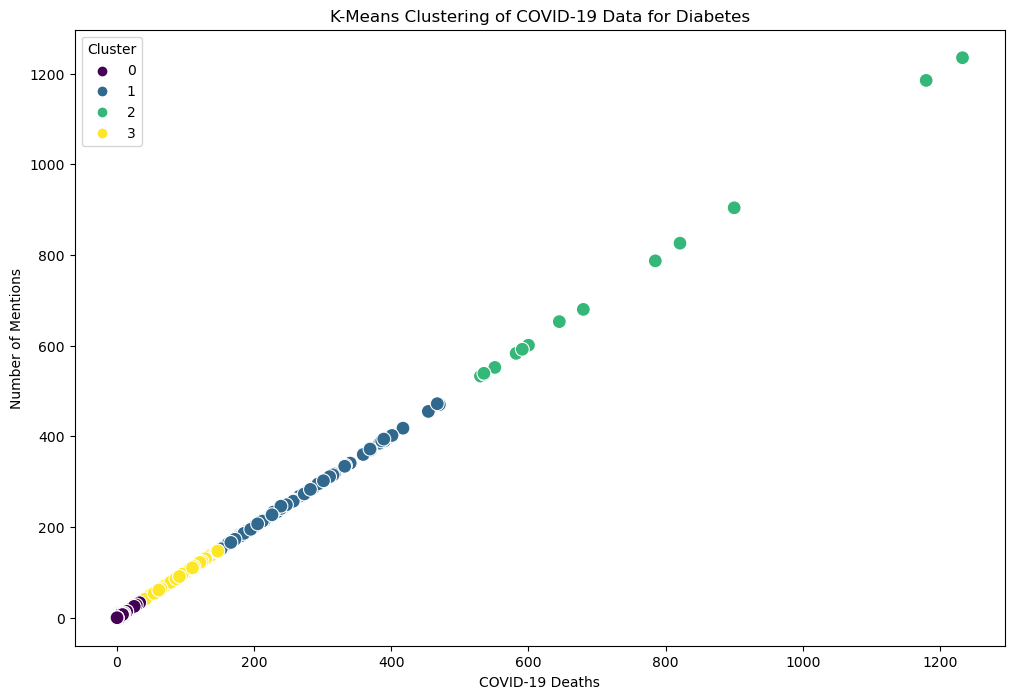

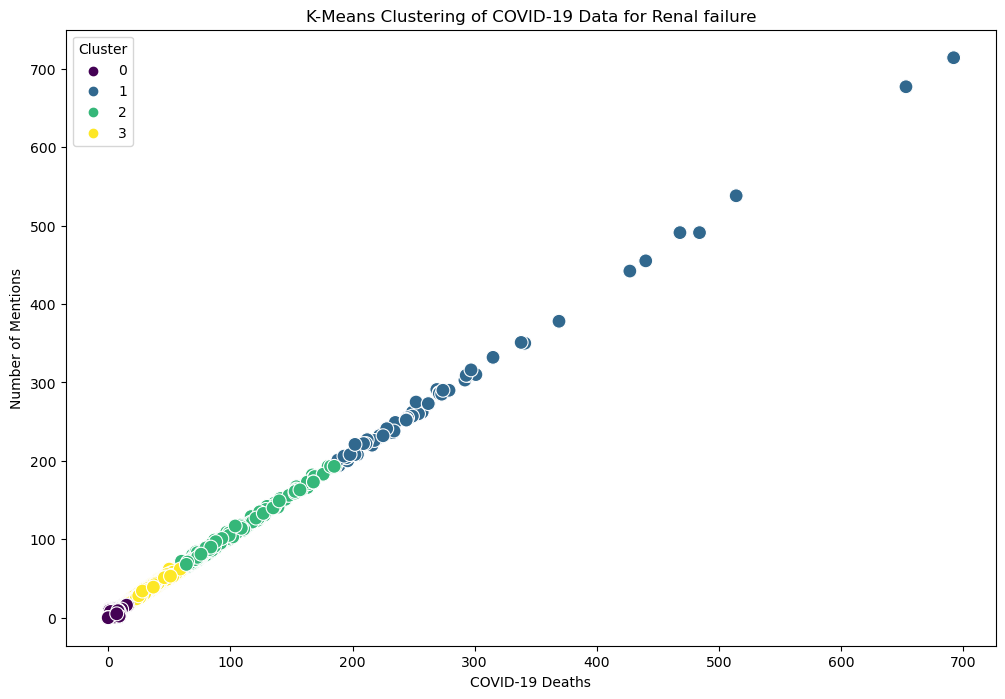

In [20]:
# # Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']

# Loop through each condition, runniing the k-means clustering analysis and creating scatterplots
for condition in top_conditions:
    # Filter the dataset for the specific condition
    df_condition = df_cov_19[df_cov_19['Condition'] == condition].copy()
    
    # Select relevant features for clustering
    features_condition = df_condition[['COVID-19 Deaths', 'Number of Mentions']]
    
    # Standardize the data
    scaled_features_condition = scaler.fit_transform(features_condition)
             
    # Run K-Means algorithm using optimal clusters = 4
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_condition.loc[:, 'Cluster'] = kmeans_condition.fit_predict(scaled_features_condition)
        
    # Scatterplot for the specific condition
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_condition, x='COVID-19 Deaths', y='Number of Mentions', hue='Cluster', palette='viridis', s=100)
    plt.title(f'K-Means Clustering of COVID-19 Data for {condition}')
    plt.xlabel('COVID-19 Deaths')
    plt.ylabel('Number of Mentions')
    plt.legend(title='Cluster')
    plt.show()
    
    # Export the scatter plot
    scatterplot_path = f"C:\\Users\\tjsra\\OneDrive\\Desktop\\CF data analyst\\Achievement 6\\04 Analysis\\kmeans_clustering_{condition.replace(' ', '_').lower()}.png"
    plt.savefig(scatterplot_path)
    plt.close()

## 9.  Discuss the clusters

### The clusters make sense as they group data points with similar numbers of COVID-19 Deaths and Number of Mentions. cluster 0 is the largest, indicating most data points have low numbers of deaths and mentions. cluster 1 and 2 represent groups with increasing numbers of deaths and mentions, and cluster 3 is between clusters 0 and 1 indicating a moderate number of deaths and mentions.

### The clusters can be interpreted meaningfully in the context of COVID-19 impact:
###  cluster 0 represents minimal impact
### cluster  3 represents moderate impact
### cluster  1 represents high impact
### cluster  2 represents very high impact

## 10. Calculate Descriptive Statistics for clusters

In [21]:
# Descriptive stats for clusters
cluster_stats = df_cov_19_numeric.groupby('Cluster').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

           Year                                          Month            \
          count         mean       std     min     max   count      mean   
Cluster                                                                    
0        419418  2021.412984  1.086724  2020.0  2023.0  419418  6.195144   
1          1199  2020.761468  0.734199  2020.0  2023.0    1199  6.030025   
2          9814  2020.932036  0.807944  2020.0  2023.0    9814  6.442735   
3           129  2020.720930  0.637092  2020.0  2022.0     129  5.100775   

                             COVID-19 Deaths                                   \
              std  min   max           count         mean         std     min   
Cluster                                                                         
0        3.327959  1.0  12.0          419418     5.484173   10.677131     0.0   
1        4.308329  1.0  12.0            1199   585.888240  204.561498   272.0   
2        4.078753  1.0  12.0            9814   148.299572   70

### Interpretation of Descriptive Statistics:

### Variability and Spread- The standard deviation values indicate that there is considerable variability within clusters, especially in clusters 1 and 2 , which have high variability in COVID-19 deaths and mentions.
### Comparison Across clusters - The mean value of COVID-19 deaths and mentions increase progressively from clusters 0 to cluster 2, highlighting the gradient of COVID-19 impact across different clusters.

## 11. How the K-means clustering Results can be Useful
###     The K-means clustering analysis can be useful in multiple future steps in an analytics pipeline. For example, by using cluster labels as new features in feature engineering or by incorporating these labels into predictive modeling to improve the accuracy and context-awareness of the models. Additionally, creating visualizations and reports based on cluster differences can enhance the communication of insights and lead to better informed decision-making.

## 12. Exporting the dataframe

In [22]:
# Export the "df_cov_19" dataframe to CSV
export_path = r"C:\Users\tjsra\OneDrive\Desktop\CF data analyst\Achievement 6\02 Data\prepared data\clustered_covid_data.csv"

In [23]:
df_cov_19.to_csv(export_path, index=False)